In [59]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

import missingno 

In [2]:
df = pd.read_csv("Casas_Dados_Faltantes.csv")

In [3]:
# Dados faltantes são apresentados como 'NaN'
df.head()

,cidade,area,quartos,banheiro,vagas_estacionamento,andar,valor_total
0,São Paulo,70.0,2.0,1.0,1,7,5618.0
1,São Paulo,NaN,4.0,4.0,0,20,7973.0
2,Porto Alegre,80.0,1.0,1.0,1,6,3841.0
3,Porto Alegre,51.0,2.0,1.0,0,2,1421.0
4,São Paulo,25.0,NaN,NaN,0,1,836.0


In [4]:
# CELULAS FALTANTES SERÃO DESCRITAS COMO ' True'
df.isnull()

,cidade,area,quartos,banheiro,vagas_estacionamento,andar,valor_total
0,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,True,True,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False


In [8]:
# SOMA DE VALORES NULOS POR COLUNA:
v_null = df.isnull().sum()
display(v_null)

cidade                  0
area                    2
quartos                 1
banheiro                1
vagas_estacionamento    0
andar                   0
valor_total             2
dtype: int64

In [9]:
# PEGA A COLUNA COM MAIS DADOS FALTANTES:
df.isnull().sum().sort_values(ascending=False)

area                    2
valor_total             2
quartos                 1
banheiro                1
cidade                  0
vagas_estacionamento    0
andar                   0
dtype: int64

In [16]:
# PROCURA VERTICALMENTE (Axis=1) DADOS FALTANTES NO DATAFRAME
# Traz todas as observações onde ao menos um dado da coluna é faltante:
dados_faltantes = df[df.isnull().any(axis = 1)].head()
display(dados_faltantes)

,cidade,area,quartos,banheiro,vagas_estacionamento,andar,valor_total
1,São Paulo,NaN,4.0,4.0,0,20,7973.0
4,São Paulo,25.0,NaN,NaN,0,1,836.0
6,Rio de Janeiro,72.0,2.0,1.0,0,7,NaN
9,Rio de Janeiro,NaN,1.0,1.0,0,2,2955.0
10,São Paulo,26.0,1.0,1.0,0,2,NaN


In [17]:
# LINHAS X COLUNAS:
df.shape

(16, 7)

In [18]:
# EMPACOTAMENTO -> LINHAS X COLUNAS em VARIAVEIS
linhas, colunas = df.shape

In [20]:
print("Linhas:", linhas, "Colunas:",colunas)

Linhas: 16 Colunas: 7


In [45]:
calculo = (df.isnull().sum() / linhas) * 100
#percentual_de_faltantes = (f"{calculo}")
print((f"{calculo}"))
#display(percentual_de_faltantes)

cidade                   0.00
area                    12.50
quartos                  6.25
banheiro                 6.25
vagas_estacionamento     0.00
andar                    0.00
valor_total             12.50
dtype: float64


In [47]:
# 'Isna'  Mesma função, nome diferente:
df.isna().sum()

cidade                  0
area                    2
quartos                 1
banheiro                1
vagas_estacionamento    0
andar                   0
valor_total             2
dtype: int64

In [51]:
# CONTRARIO -> DADOS NÃO FALTANTES !
# SOMA DOS DADOS NÃO FALTANTES:
df.notna().sum()

cidade                  16
area                    14
quartos                 15
banheiro                15
vagas_estacionamento    16
andar                   16
valor_total             14
dtype: int64

## Desative o Dark Reader mode para ver as legendas dos Gráficos:

<AxesSubplot: >

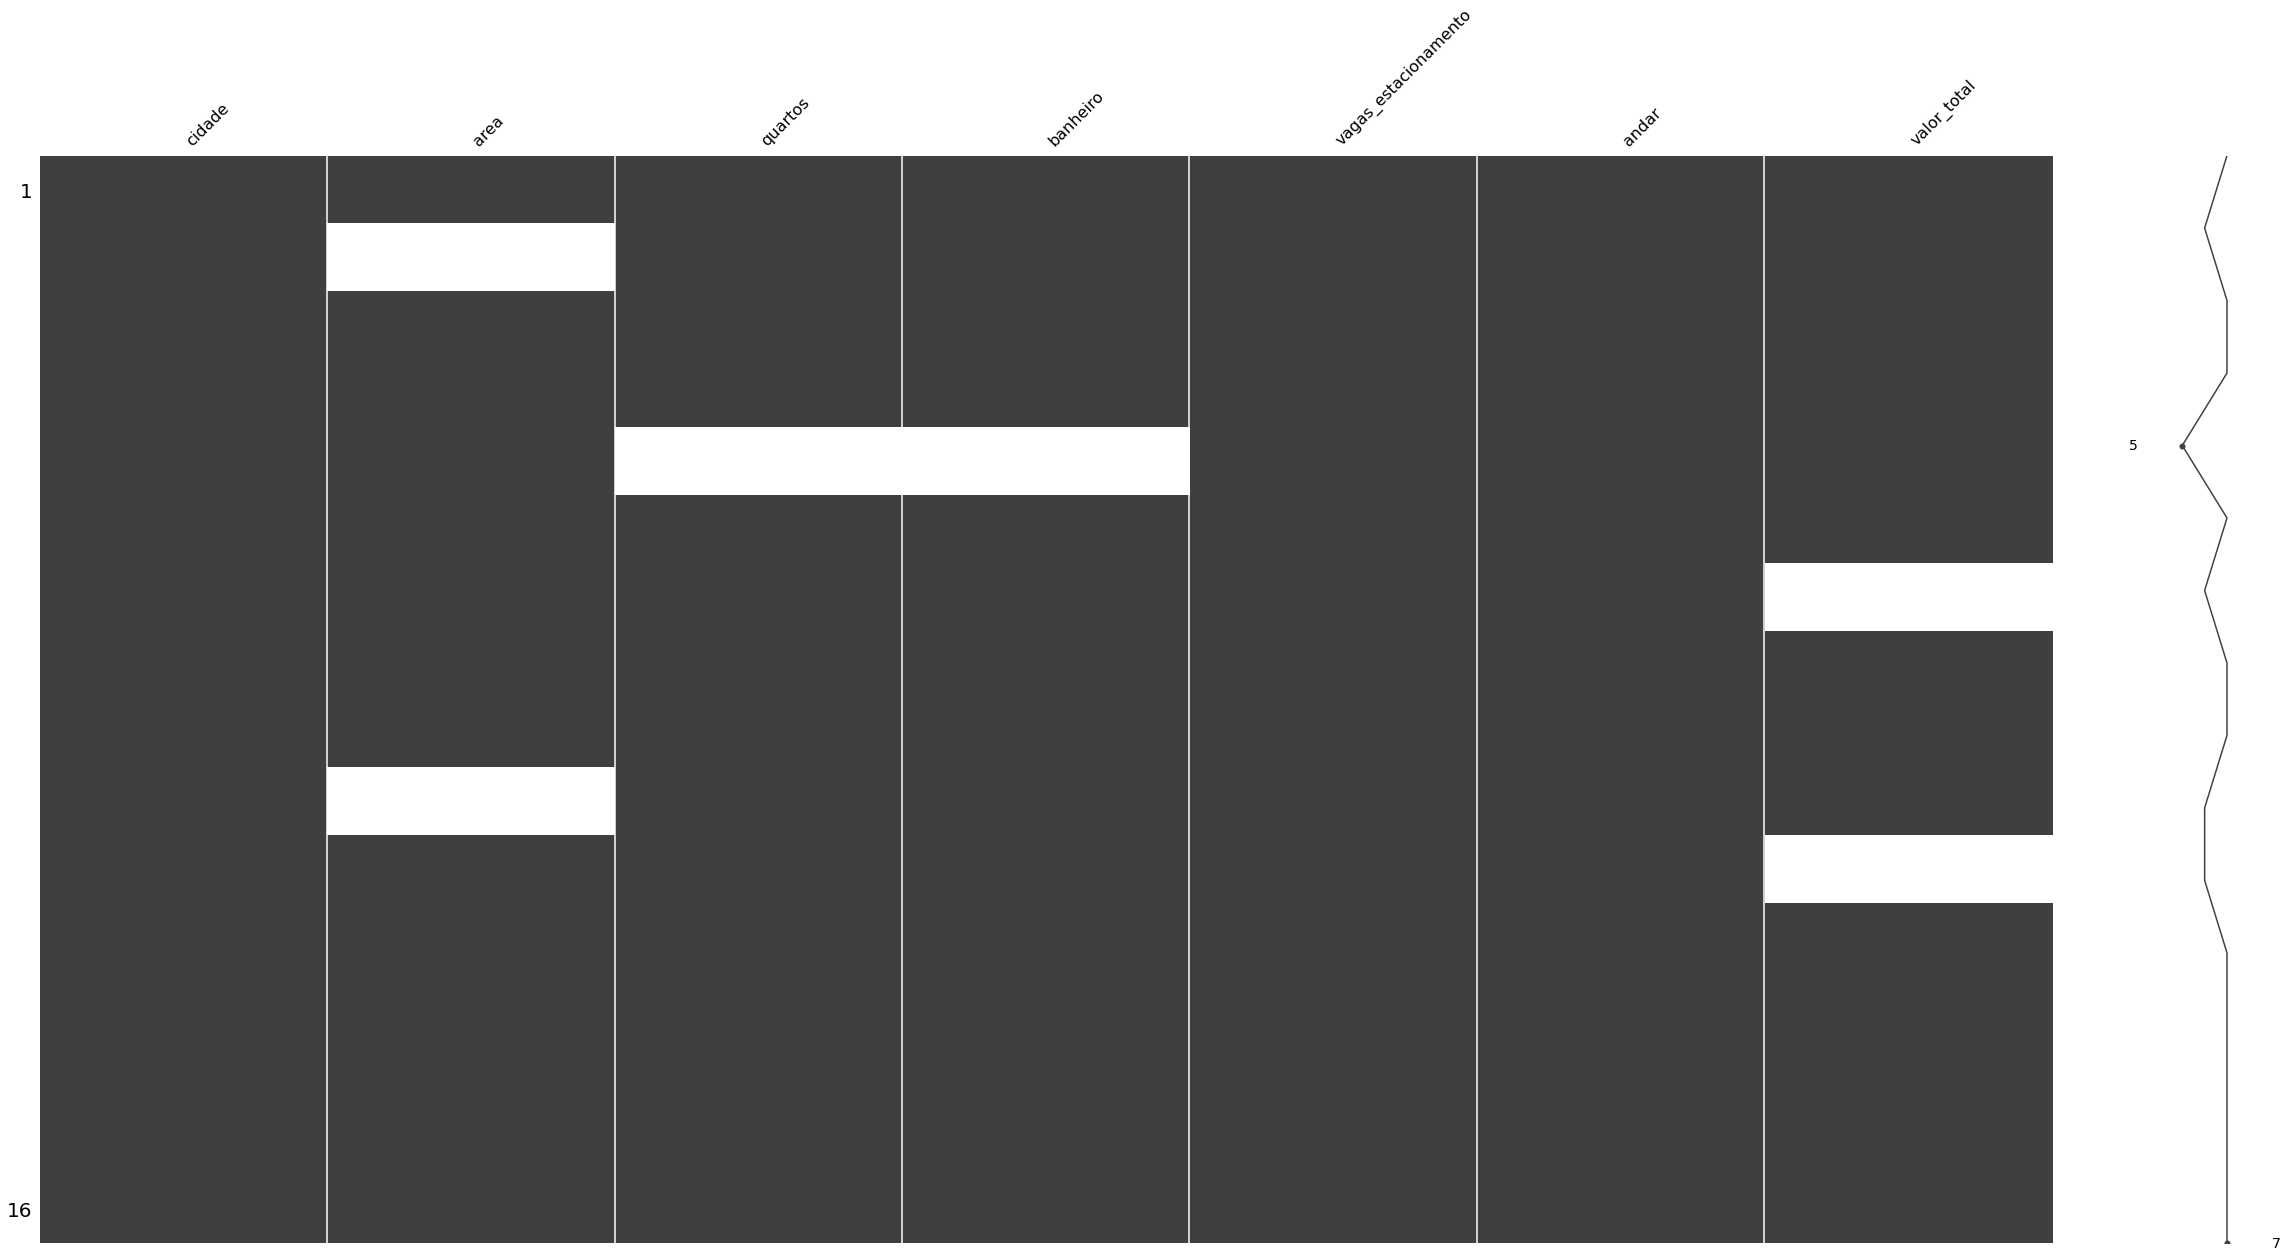

In [58]:
# AS AREAS EM BRANCO CORRESPONDEM A DADOS FALTANTES NO DATAFRAME:
missingno.matrix(df, figsize=(40,20))

<AxesSubplot: >

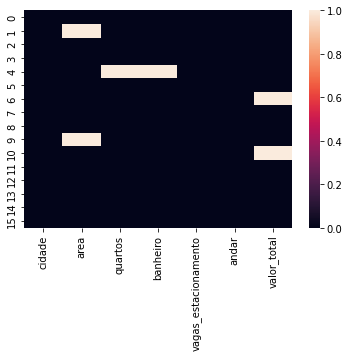

In [60]:
sns.heatmap(df.isnull())